<a href="https://colab.research.google.com/github/Jay-mishra04/Machine_learning_project-Breast-Cancer-Classification-/blob/main/Breast_Cancer_Prediction(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary

## Breast Cancer Classification Using Machine Learning

Breast cancer is one of the most common cancers affecting women worldwide. Early diagnosis and treatment are crucial for improving survival rates and patient outcomes. Fine Needle Aspiration (FNA) is a minimally invasive diagnostic procedure used to extract cellular material from breast masses for examination. The Breast Cancer Wisconsin (Diagnostic) dataset, developed by Dr. William H. Wolberg at the University of Wisconsin-Madison, provides digitized images of FNA of breast masses, describing characteristics of the cell nuclei present in these images.


### Objective
The primary objective of this project is to develop a machine learning model that can accurately classify whether a breast mass is benign or malignant based on the provided features. By leveraging various classification algorithms, we aim to improve the accuracy of breast cancer diagnosis, aiding healthcare professionals in making informed decisions.

#### Methodology
##### Data Exploration and Preprocessing:

Analyze the dataset to understand the distribution of features.

Perform data cleaning and normalization to prepare the data for modeling.


##### Feature Selection and Engineering:
Select the most relevant features that contribute to the classification.

Engineer new features if necessary to enhance model performance.


##### Model Development:
Implement various classification algorithms such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and Neural Networks.

Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.


##### Model Evaluation and Selection:
Compare the performance of different models.

Select the best-performing model based on evaluation metrics.


##### Model Optimization and Deployment:
Optimize the selected model using techniques like hyperparameter tuning.

Deploy the model for practical use in a clinical setting.

## Dataset Overview

The dataset comprises 569 instances, each with 32 attributes. The attributes include an ID number, diagnosis label (M for malignant and B for benign), and 30 real-valued features that are computed for each cell nucleus. These features describe the properties of the cell nuclei, including:

###### Diagnosis
1. diagnosis: Label indicating whether the tumor is malignant (M) or benign (B).

###### Mean Values
2. radius_mean: Average distance from the center to points on the perimeter of the cell nucleus.
3. texture_mean: Standard deviation of gray-scale values.
4. perimeter_mean: Mean perimeter of the cell nucleus.
5. area_mean: Mean area of the cell nucleus.
6. smoothness_mean: Mean local variation in radius lengths.
7. compactness_mean: Mean compactness, calculated as (perimeter^2 / area) - 1.0.
8. concavity_mean: Mean severity of concave portions of the contour.
9. concave points_mean: Mean number of concave portions of the contour.
10. symmetry_mean: Mean symmetry of the cell nucleus.
11. fractal_dimension_mean: Mean "coastline approximation" (fractal dimension) - 1.

###### Standard Error Values
12. radius_se: Standard error of the radius.
13. texture_se: Standard error of the texture.
14. perimeter_se: Standard error of the perimeter.
15. area_se: Standard error of the area.
16. smoothness_se: Standard error of the smoothness.
17. compactness_se: Standard error of the compactness.
18. concavity_se: Standard error of the concavity.
19. concave points_se: Standard error of the number of concave points.
20. symmetry_se: Standard error of the symmetry.
21. fractal_dimension_se: Standard error of the fractal dimension.

###### Worst (Largest) Values
22. radius_worst: Largest (mean of the three largest) radius values.
23. texture_worst: Largest texture values.
24. perimeter_worst: Largest perimeter values.
25. area_worst: Largest area values.
26. smoothness_worst: Largest smoothness values.
27. compactness_worst: Largest compactness values.
28. concavity_worst: Largest concavity values.
29. concave points_worst: Largest number of concave points.
30. symmetry_worst: Largest symmetry values.
31. fractal_dimension_worst: Largest fractal dimension values.

For each feature, the mean, standard error, and "worst" or largest (mean of the three largest values) were computed, resulting in a total of 30 features per instance. The data is pre-processed, with no missing values, and is recorded with four significant digits.

###### Class Distribution
- Benign: 357 instances
- Malignant: 212 instances

# Let's Begin

###### Dataset link

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

##### Importing all the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')



###### Dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/projects/Machine Learning Project (Breast Cancer Classification)/data.csv")

In [6]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
184,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.12260,0.3175,0.09772,NaN
118,864877,M,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,...,30.50,130.30,1272.0,0.1855,0.4925,0.7356,0.20340,0.3274,0.12520,NaN
172,87164,M,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,...,17.04,125.00,1102.0,0.1531,0.3583,0.5830,0.18270,0.3216,0.10100,NaN
312,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,...,16.40,92.04,618.8,0.1194,0.2208,0.1769,0.08411,0.2564,0.08253,NaN
95,86208,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,...,31.59,156.10,1750.0,0.1190,0.3539,0.4098,0.15730,0.3689,0.08368,NaN


###### Dataset Exploration

In [ ]:
# checking rows and columns

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 569
Columns: 33


In [ ]:
# Basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# columns with categorical values

df.select_dtypes(include = 'object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
# columns with numerical values

df.select_dtypes(include = ['float64', 'int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Count of categorical column
print("The number of Categorical column in the Dataset is:", len(df.select_dtypes(include = 'object').columns))

The number of Categorical column in the Dataset is: 1


In [ ]:
# Count of numerical column
print("The number of Numerical column in the Dataset is:", len(df.select_dtypes(include = ['float64', 'int64']).columns))

The number of Numerical column in the Dataset is: 32


In [ ]:
# baisc stastical values

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#####  Null values

In [ ]:
# checking for the null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [ ]:
# droping the column named as Unnamed:32

df.drop(columns = 'Unnamed: 32', inplace = True)

In [ ]:
# checking again for the null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##### Dupicate values

In [ ]:
df.duplicated().sum()

0

#### Insights Found and Manipulation I have done

- There are 33 columns and 569 rows in total.
- There is an irrelavant column named as Unnamed: 32, which i dropped from the dataset.
- Diagnosis column is the only column with categorical values
- All the other columns are numerical columns
- Diagonis column is my target variable
- All the other columns are input variables
- There are no duplicates

### Data Visualisation

In [ ]:
# dropping id column as we dont need that column for visualization
df.drop(columns='id', inplace=True)

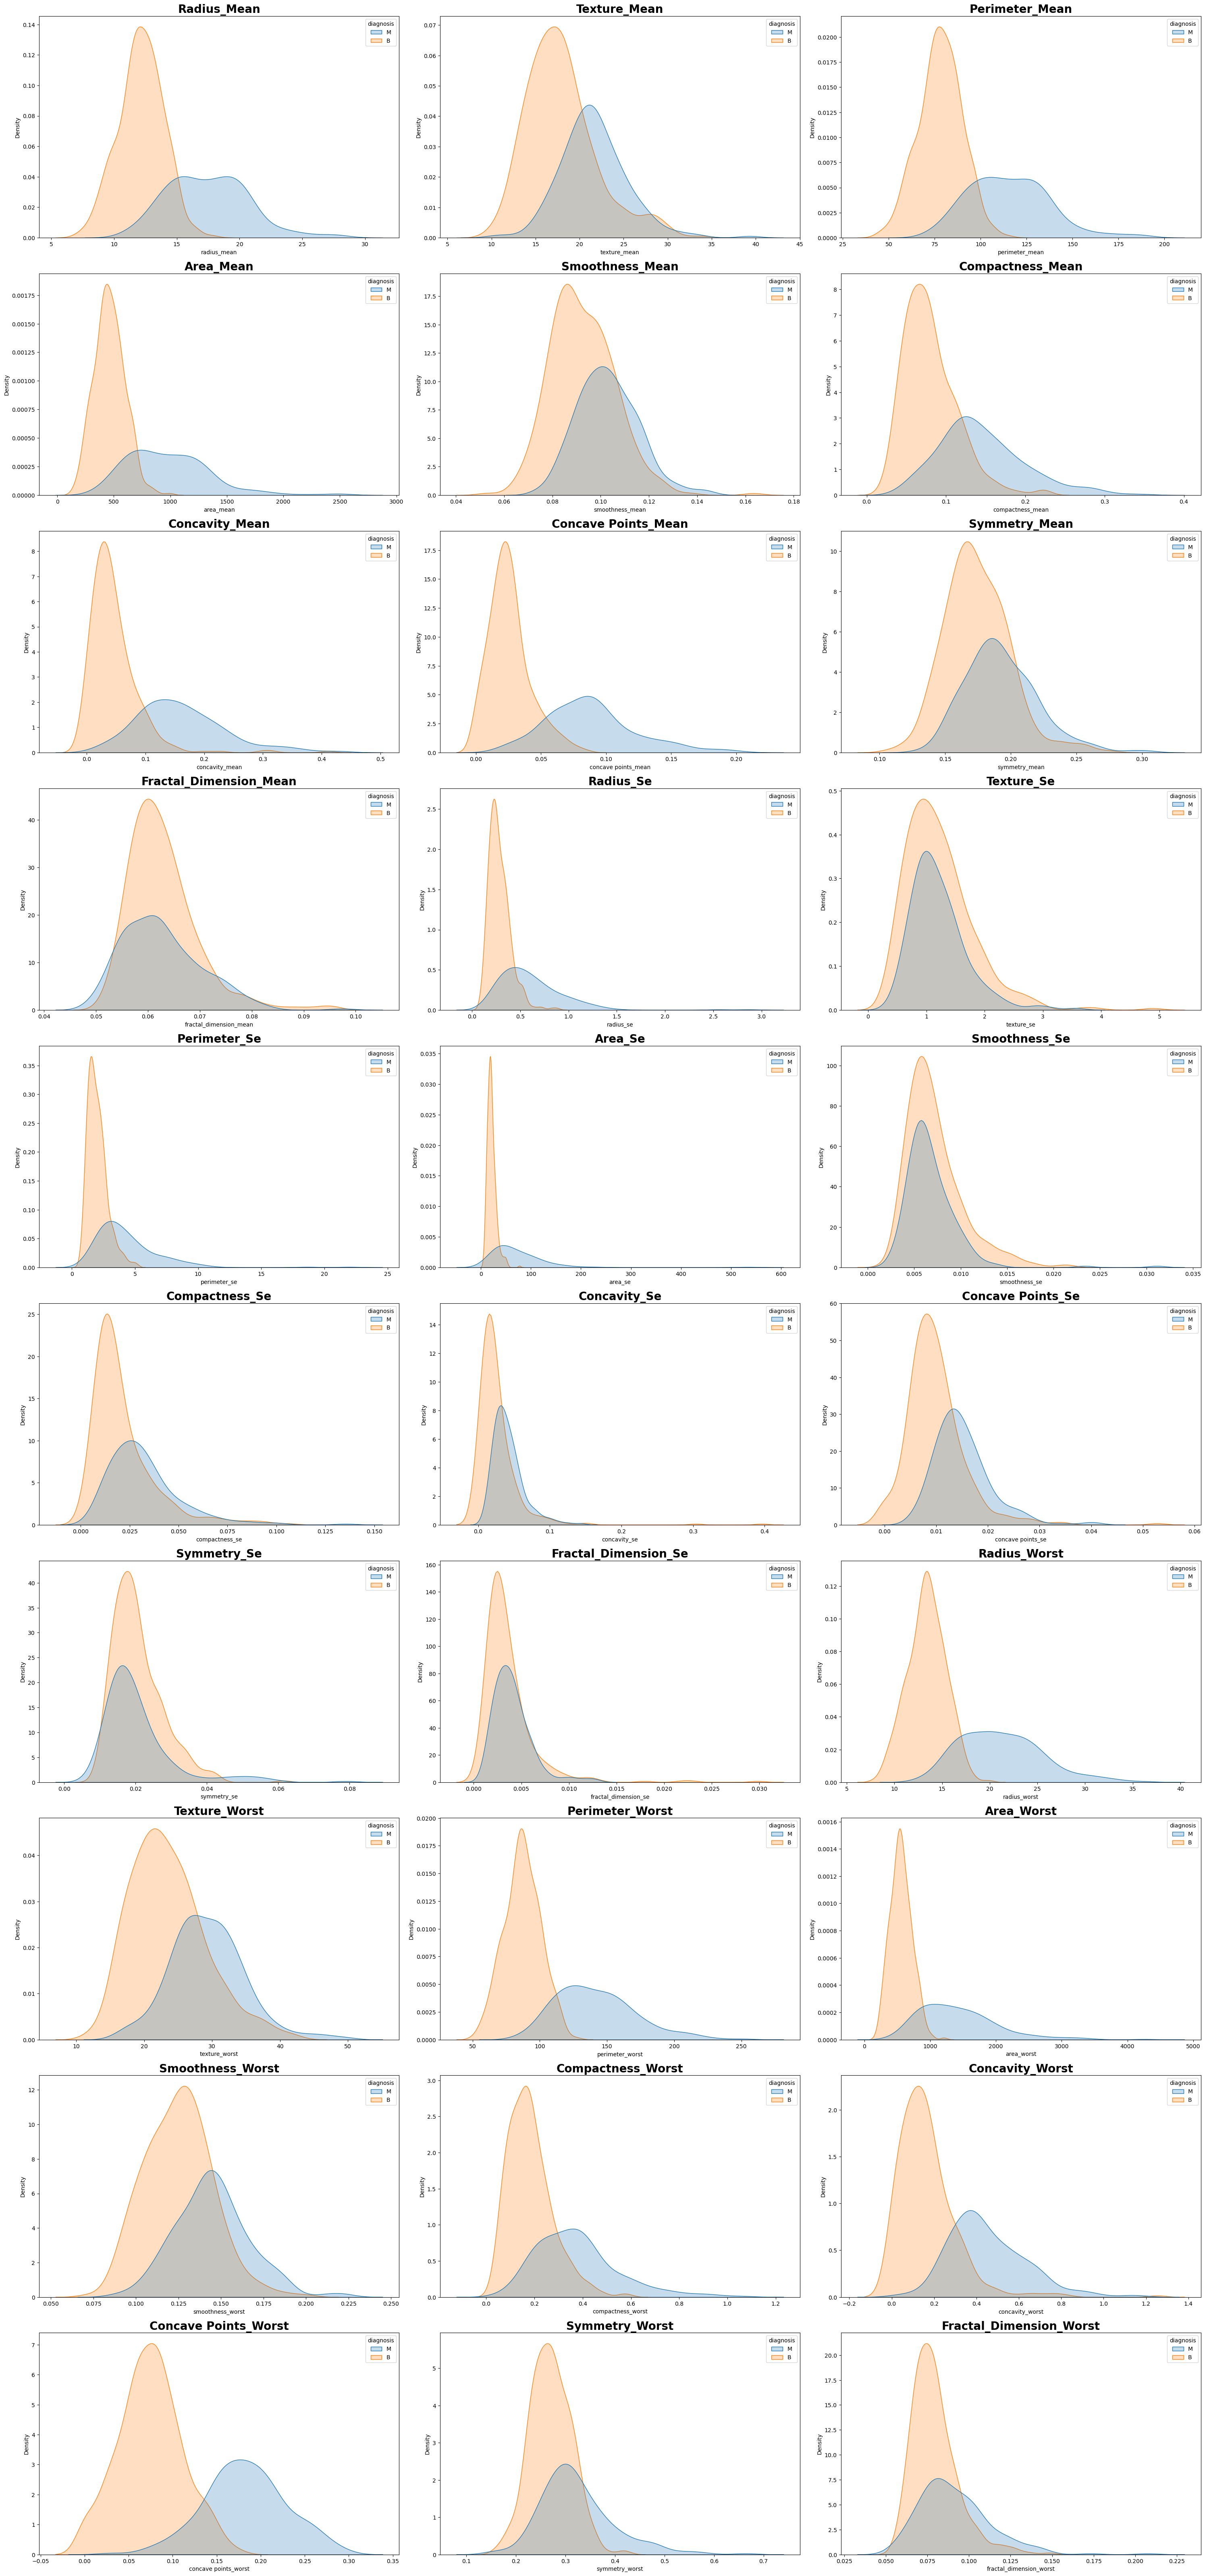

In [ ]:
# checking the distribution of the columns
numeric_features= list(df.select_dtypes(include = ['float64', 'int64']).columns)
plt.figure(figsize=(30,70))
for n,column in enumerate(numeric_features):
  plt.subplot(11, 3, n+1)
  sns.kdeplot(x=df[column], hue = df['diagnosis'], fill=True)
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

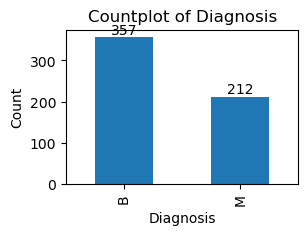

In [ ]:
# checking the distribution of the diagonises column
diagnosis_counts = df['diagnosis'].value_counts()

ax = diagnosis_counts.plot(kind="bar", figsize=(3, 2))

for container in ax.containers:
    ax.bar_label(container)

plt.title('Countplot of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
# converting the categorical column to numerical
new_df = pd.get_dummies(data = df, drop_first = True)
new_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [ ]:
# view correlation of every column with target column
corr_values = new_df.corrwith(new_df['diagnosis_M']).sort_values()
corr_values

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

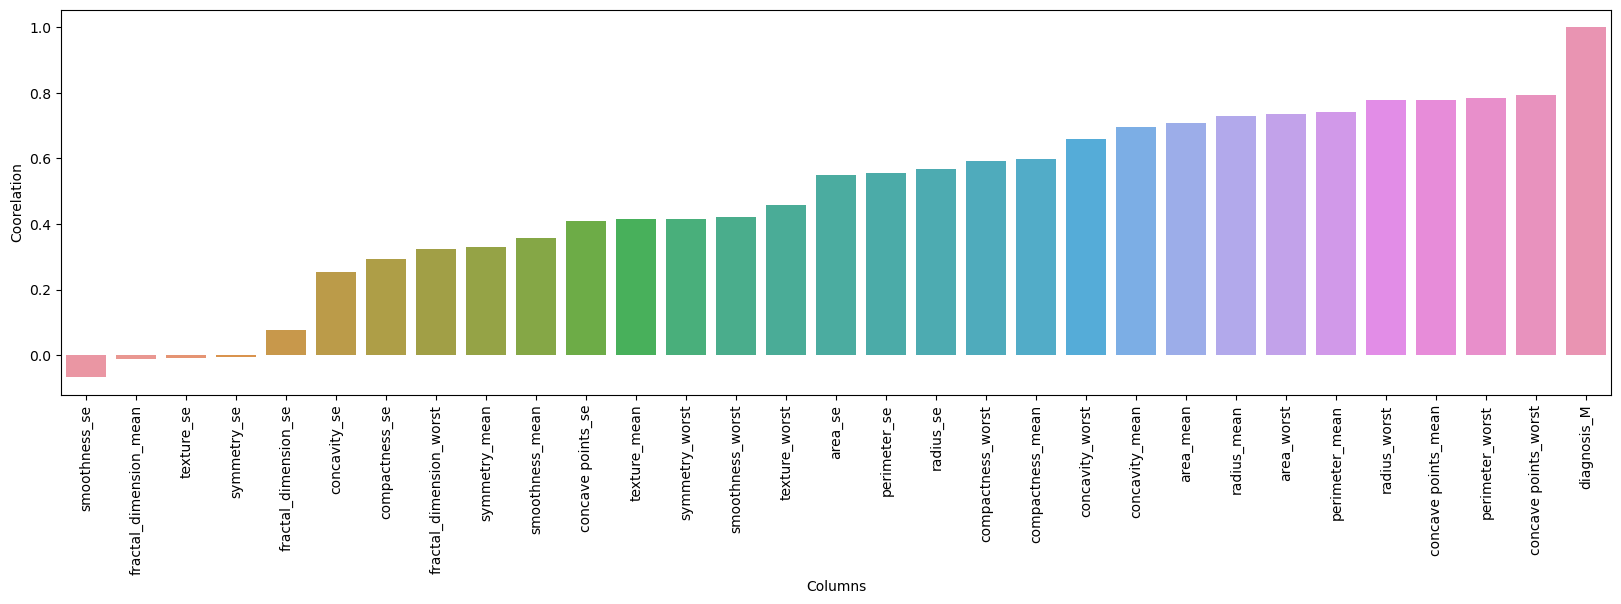

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x=corr_values.index, y=corr_values.values)
plt.xticks(rotation = 90)
plt.xlabel("Columns")
plt.ylabel("Coorelation")
plt.show()

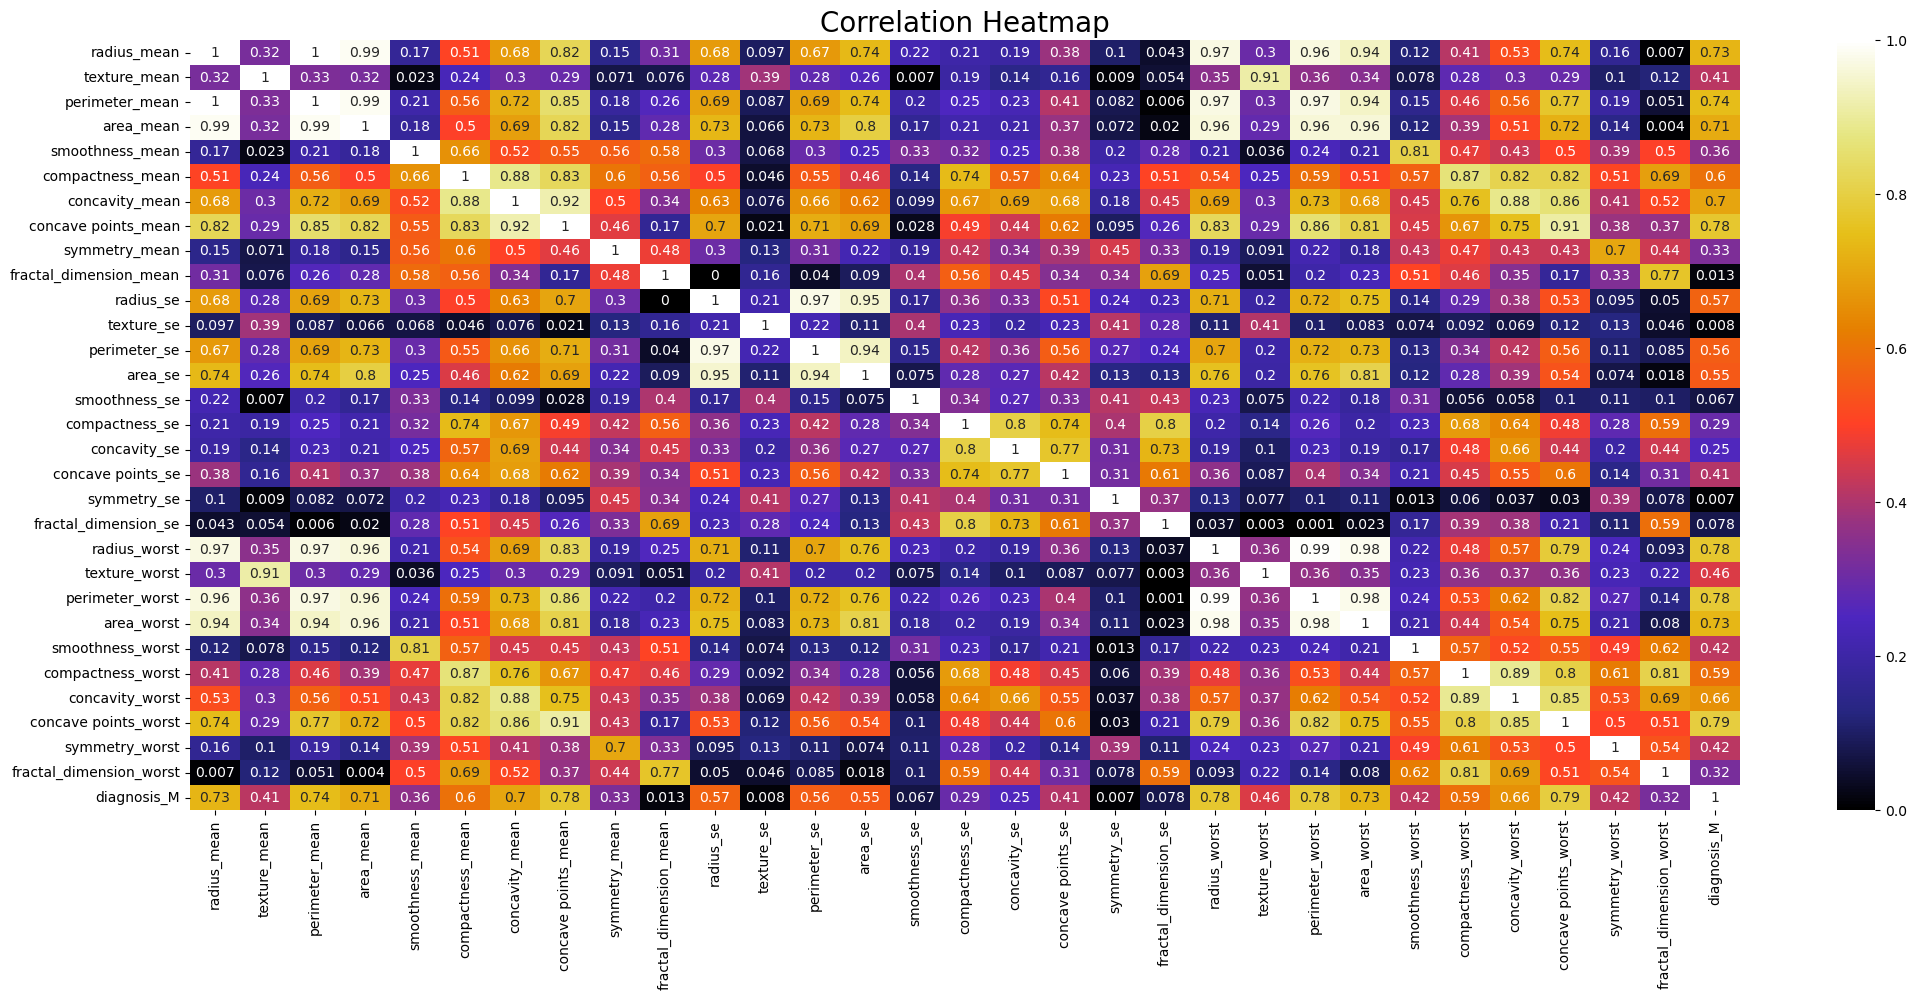

In [ ]:
# Plot correlation heatmap for numeric columns only
plt.figure(figsize=(25, 10))
sns.heatmap(abs(round(new_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)
plt.title('Correlation Heatmap', size=20)
plt.show()

#### Insights Found and Manipulation I have done

###### Class Distribution:
- Benign Tumors: 357 instances
- Malignant Tumors: 212 instances

##### KDE Plot Analysis:
- Benign Tumors: The KDE plots for all columns are left-skewed, indicating that the distribution of values for benign tumors tends to cluster at the lower end of the range for most features.
- Malignant Tumors: The KDE plots for all columns are centered, suggesting a more uniform distribution around the mean for malignant tumors.

###### Correlation Insights:
###### Negative Correlation:
- Smoothness SE: Higher values are associated with benign tumors.
- Fractal Dimension Mean: Higher values are associated with benign tumors.
- Texture: Higher values are associated with benign tumors.

###### Positive Correlation:
- Radius Worst: Higher values are strongly associated with malignant tumors.
- Perimeter Worst: Higher values are strongly associated with malignant tumors.
- Concave Points Worst: Higher values are strongly associated with malignant tumors.

###### Manipulations Performed
- Data Visualization: KDE plots were used to visualize the distribution of features for benign and malignant tumors.
- Correlation Analysis: Identified features with significant positive and negative correlations with malignant tumors.

### Preparing Data for ML algorithms

In [ ]:
X= new_df.iloc[:,:-1]
y= new_df.iloc[:,-1]
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(114, 30)
(114,)


### Scaling the data using Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [ ]:
X_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

# Building the first model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
pre_lr = precision_score(y_test, y_pred)
rec_lr = recall_score(y_test, y_pred)

print("Accuracy:", acc_lr)
print("F1_score:", f1_lr)
print("Precision:", pre_lr)
print("Recall:", rec_lr)

Accuracy: 0.9649122807017544
F1_score: 0.9523809523809523
Precision: 0.975609756097561
Recall: 0.9302325581395349


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  1]
 [ 2 41]]


##### cross-validation

In [ ]:
from sklearn.model_selection import  cross_val_score
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
mean_value_lr =cv_scores_lr.mean()
print(f'Cross-validation Accuracy Scores: {cv_scores_lr}')
print(f'Average Cross-validation Accuracy: {cv_scores_lr.mean()}')


Cross-validation Accuracy Scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Average Cross-validation Accuracy: 0.9736263736263737


##### Logistic Regression is giving decent Accuracy. Let's try another algorithm for comparison

# Building the Second model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
pre_rfc = precision_score(y_test, y_pred_rfc)
rec_rfc = recall_score(y_test, y_pred_rfc)

print("Accuracy:", acc_rfc)
print("F1_score:", f1_rfc)
print("Precision:", pre_rfc)
print("Recall:", rec_rfc)

Accuracy: 0.9649122807017544
F1_score: 0.9523809523809523
Precision: 0.975609756097561
Recall: 0.9302325581395349


In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

[[70  1]
 [ 3 40]]


##### cross-validation

In [ ]:
from sklearn.model_selection import  cross_val_score
cv_scores_rfc = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
mean_value_rfc =cv_scores_rfc.mean()
print(f'Cross-validation Accuracy Scores: {cv_scores_rfc}')
print(f'Average Cross-validation Accuracy: {cv_scores_rfc.mean()}')

Cross-validation Accuracy Scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.95604396]
Average Cross-validation Accuracy: 0.9626373626373625


#### comparison between models

In [ ]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_lr, acc_rfc],
    'F1 Score': [f1_lr, f1_rfc],
    'Precision': [pre_lr, pre_rfc],
    'Recall': [rec_lr, rec_rfc],
    'Cross-Val' : [mean_value_lr, mean_value_rfc]
}

comparison_df = pd.DataFrame(metrics)
comparison_df

,Model,Accuracy,F1 Score,Precision,Recall,Cross-Val
0,Logistic Regression,0.964912,0.952381,0.97561,0.930233,0.973626
1,Random Forest,0.964912,0.952381,0.97561,0.930233,0.962637


###### After comparison Logistic Regression and Random Forest, it can be said that Logistic Regression is performing better than Random Forest by a small margin.

### RandomSearch for Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'none', 'elasticnet'],
    'C': [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_log_reg = random_search.best_estimator_

# Predict on test data
y_pred = best_log_reg.predict(X_test)

# Calculate metrics
acc_rs = accuracy_score(y_test, y_pred)
f1_rs = f1_score(y_test, y_pred)
pre_rs = precision_score(y_test, y_pred)
rec_rs = recall_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", acc_rs)
print("F1 Score:", f1_rs)
print("Precision:", pre_rs)
print("Recall:", rec_rs)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 1.5}
Accuracy: 0.9912280701754386
F1 Score: 0.9882352941176471
Precision: 1.0
Recall: 0.9767441860465116


In [ ]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Logistic Regression with Random Search'],
    'Accuracy': [acc_lr, acc_rfc, acc_rs],
    'F1 Score': [f1_lr, f1_rfc, f1_rs],
    'Precision': [pre_lr, pre_rfc, pre_rs],
    'Recall': [rec_lr, rec_rfc, rec_rs],
    'Cross-Val': [mean_value_lr, mean_value_rfc, np.nan]
}

comparison_df = pd.DataFrame(metrics)
comparison_df

,Model,Accuracy,F1 Score,Precision,Recall,Cross-Val
0,Logistic Regression,0.964912,0.952381,0.97561,0.930233,0.973626
1,Random Forest,0.964912,0.952381,0.97561,0.930233,0.962637
2,Logistic Regression with Random Search,0.991228,0.988235,1.00000,0.976744,NaN


##### After a thorough comparison of all three models, I have decided to select the Logistic Regression model. This choice is based on its strong performance with manually tuned hyperparameters, which yielded the most promising results.

### Final Model (Logistic Regression)

In [ ]:
lr_final = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 100, C=1.5)

In [ ]:
lr_final.fit(X_train, y_train)

LogisticRegression(C=1.5, solver='saga')

In [ ]:
y_predict = lr_final.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
pre = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)

print("Accuracy:", acc)
print("F1_score:", f1)
print("Precision:", pre)
print("Recall:", rec)

Accuracy: 0.9912280701754386
F1_score: 0.9882352941176471
Precision: 1.0
Recall: 0.9767441860465116


In [ ]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[71  0]
 [ 1 42]]


In [ ]:
cv_scores = cross_val_score(lr_final, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-validation Accuracy: {cv_scores.mean()}')

Cross-validation Accuracy Scores: [0.98901099 0.96703297 1.         0.97802198 0.95604396]
Average Cross-validation Accuracy: 0.9780219780219781


# Prediction for a new pateint

In [ ]:
new_df.sample()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399,False


In [ ]:
patient_data = new_df.iloc[546,:-1].values
patient_data_2d = np.reshape(patient_data, (1, -1))
patient_data_2d

array([[10.32, 16.35, 65.31, 324.9, 0.09434, 0.04994, 0.01012, 0.005495,
        0.1885, 0.06201, 0.2104, 0.967, 1.356, 12.97, 0.007086, 0.007247,
        0.01012, 0.005495, 0.0156, 0.002606, 11.25, 21.77, 71.12, 384.9,
        0.1285, 0.08842, 0.04384, 0.02381, 0.2681, 0.07399]], dtype=object)

In [ ]:
lr_final.predict(ss.transform(patient_data_2d))

array([False])

### Conclusion


By applying machine learning techniques to the Breast Cancer Wisconsin (Diagnostic) dataset, this project aims to develop an accurate and reliable classification model for breast cancer diagnosis. The successful implementation of this model can significantly aid in early detection and treatment, ultimately improving patient outcomes and survival rates.